# TermProject Mid-Term Report

소프트웨어융합학과 2019102121 이한수

# 목차 (클릭하시면 해당 항목으로 이동합니다)

## &nbsp; [Proposal](#Proposal)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [1.주제](#1.주제)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [2. 주제 선정 이유](#2.주제-선정-이유)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [3. 기획](#3.기획)

## &nbsp; [Report](#Report)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [4.Framwrok](#4.Framework)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [5.Prototype](#5.Prototype)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [6.GitHub](#6.GitHub)
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [7.Todo](#7.Todo)

<hr>

## Proposal

### 1.주제

1. PyGame을 이용하여 게임 만들기

2. PyGame프레임 워크를 개발하기

3. 물리와 삼각함수를 게임에 적용시켜보기

### 2.주제 선정 이유

**1. 왜 PyGame을 이용하여 게임을 만드는가?**

게임은 다양한 소프트웨어 기술들의 집합체입니다.

그런 개발에 필요한 기술들을 파이썬 언어에서는 다양한 모듈들을 통해 손쉽게 사용할 수 있습니다.

그런 장점이 있는 언어를 이용하여 게임 개발을 해는 것이 좋다고 생각하였습니다.

따라서 파이썬에서 게임 개발을 지원해주는 PyGame을 이용하기로 결정하였습니다.

**2. 왜 PyGame 프레임 워크를 개발하는가?**

PyGame은 게임 엔진이 아니라 기능을 지원해주는 모듈입니다.

따라서 게임 개발을 하면 PyGame의 기능을 반복적으로 사용하는 일이 있습니다.

반복 되는 행동과 코드의 양을 동시에 줄이기 위해 함수화하고

그 함수들을 클래스로 묶는 것이 개발 하는데 최적화 방법이므로

프레임워크를 개발해보는 것이 좋다고 생각하였습니다.

**3. 왜 물리와 삼각함수를 게임에 적용시켜보는가?**

고등학교 때부터 게임을 만들기 위해서는 물리와 수학이 중요하다고 들어왔습니다.

대학교에 진학하여 물리와 미적분을 배우면서 게임에 응용할만한 내용이 많다고 생각이 들었습니다.

게임에서 물리와 수학이 어떻게 쓰일 수 있는지 경험해보고자 물리와 수학을 게임에 적용시켜보는 것을 주제로 삼았습니다.

또한 저는 게임콘텐츠 트랙을 희망하고 있어 게임 개발 프로젝트를 진행해보는 것이 좋다고 생각하였습니다.

### 3.기획

씬은 mainScene, gameScene, rankingScene 세 가지 씬이 존재합니다.

플레이어와 공, 데이터들은 singleton class로 구현할 것입니다.

게임이 시작되면 공을 띄우고 그 공을 때릴 수 있습니다.

단, 친 공은 물이 아닌 땅에 떨어져야합니다.

이런 조건을 지키기 위해 플레이어가 공에 가하는 힘과 각도를 조절 할 필요가 있습니다.

그 조건이 이 게임에서 가장 중요한 요소입니다.

플레이어가 친 공이 땅에 떨어지면 point가 +1이 되며 그 위치에서 한 번 더 타격을 할 수있습니다.

이런 동작을 물에 떨어질 때까지나 목적지에 다다를 때까지 반복합니다.

결과에 따라 보상을 받을 것이며

그 보상(재화)으로 플레이어가 가할 수 있는 힘의 최대치를 증가한다던지,

공의 탄성도를 증가시킨다던지 등 게임의 요소를 구매할 수 있습니다.

미적분 시간에 배웠던 쌍곡선 삼각함수를 이용하여 바다 파도를 구현할 것입니다.

또 물리 시간에 배웠던 포물선 운동을 이용하여 공의 움직임을 구현할 것입니다.

mainScene
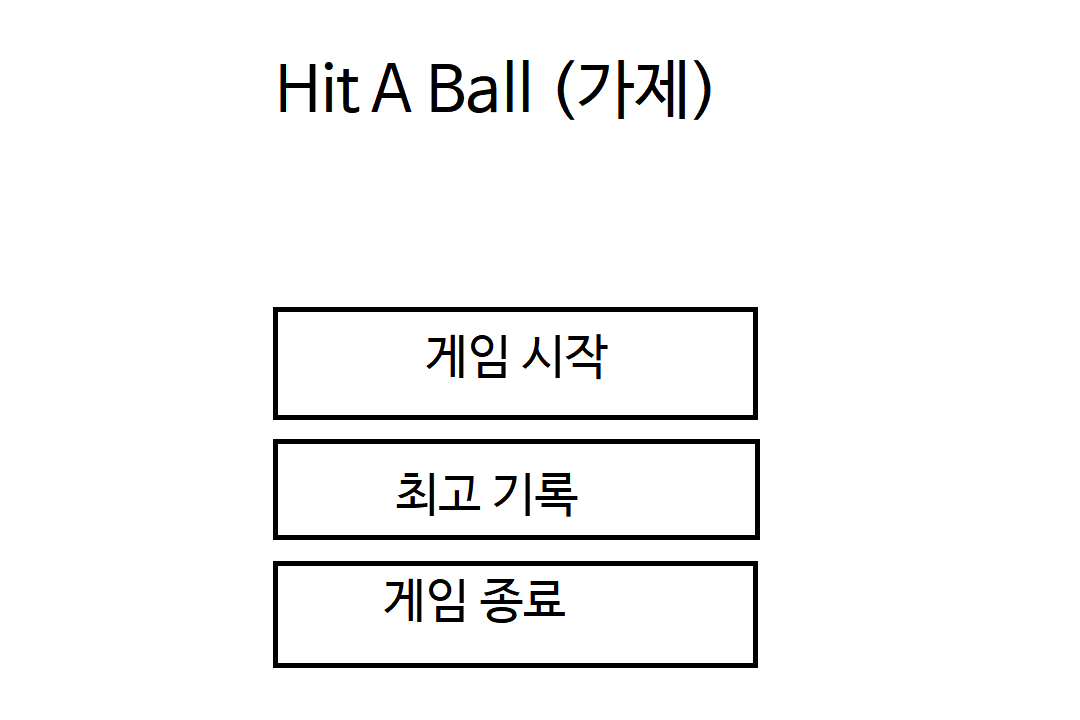

gameScene
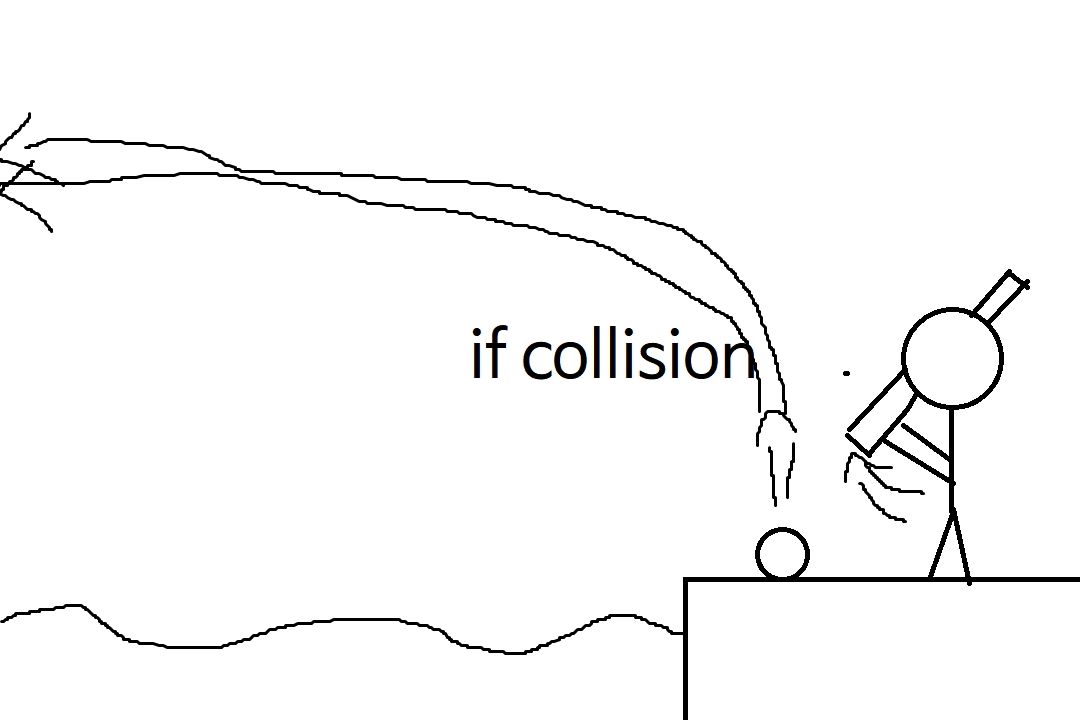
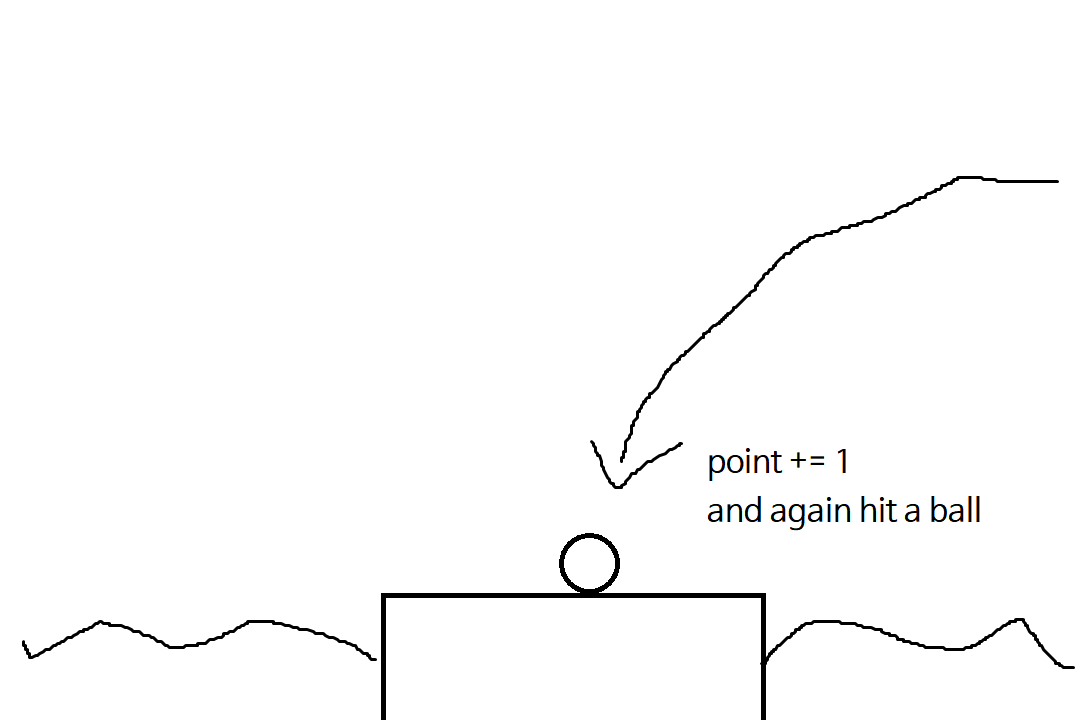

## Report

### 4.Framework

뼈대 공사먼저 하여 건물을 튼튼하게 짓는 것 처럼

프레임워크를 작성하여 게임 개발을 용이하게 하도록 하였습니다

pygame은 기본적인 프레임 워크를 지원하지 않습니다.

따라서 개발 결과물을 보면 한 파일에 

프레임

사운드 기능과 씬 전환 기능을



아래는 애니메이션 기능을 구현한 animaton.py 파일입니다.

pygame은 애니메이션을 직접적으로 지원하지 않기 때문에 이미지의 반복으로 애니메이션을 구현하였습니다.

각각의 Sprite를 리스트에 저장한 후 정해진 frame 수를 만큼 index를 반복합니다.

In [5]:
import pygame
from pygame import Surface
from pygame.color import Color
from pygame.sprite import Sprite

class Animation(Sprite) :
    def __init__(self, images, frames):
        Sprite.__init__(self)
        self.clock = pygame.time.Clock()

        self.images = list()
        self.frames = frames

        for i in images :
            self.images.append(pygame.image.load(i))

        self.image_count = len(images)
        self.current_frame = 0
        self.image = self.images[self.current_frame]

        self.rect = pygame.Rect(0, 0, self.image.convert().get_width(), self.image.convert().get_height())

    def update(self):
        if self.current_frame is self.image_count -1 :
            self.current_frame = 0
        else:
            self.current_frame += 1
        self.image = self.images[self.current_frame]
        self.clock.tick(self.frames)

    def set_position(self, pos) :
        self.rect.x = pos[0]
        self.rect.y = pos[1]


아래는 씬 전환 기능을 구현한 sceneManager.py 파일입니다.

파일에는 Scene과 SceneManager 이 두 가지 클래스가 있습니다.

게임 내의 모든 씬은 Scene클래스를 상속받으며 60프레임으로 반복되는 함수 update에서 이미지 랜더와 오브젝트 동작이 동시에 이뤄집니다.

In [6]:
class Scene() :
    def update(self) :
        pass
    def load_resources(self) :
        pass
    def ui_event(self) :
        pass

class SceneManager(Scene) :
    instance = None

    def __init__(self) :
        self.isQuit = False

    @classmethod
    def getInstance(cls) :
        if cls.instance is None :
            cls.instance = SceneManager()
        return cls.instance

    def changeScene(self, replaced_scene) :
        self.current_scene = replaced_scene

    def update(self) :
        self.current_scene.update()

    def setQuit(self, isQuit) :
        self.isQuit = isQuit


아래는 simple_image.py 파일입니다.

SimpleImage 클래스는 단순한 배경화면, UI 등 pygame의 Sprite클래스의 모든 기능이 필요하지 않은 Image를 위해 구현하였습니다.

In [4]:
import pygame

class SimpleImage() :

    centerMode = False

    def __init__(self, directory) :
        self.image = pygame.image.load(directory)
        self.rect = self.image.get_rect()

    def getInfo(self) :
        return (self.image, self.rect)

    def setPos(self, pos) :
        self.rect.x = pos[0] - (self.getSize()[0] // 2) if self.centerMode else 0
        self.rect.y = pos[1] - (self.getSize()[1] // 2) if self.centerMode else 0

    def addPos(self, pos) :
        self.rect.x += pos[0]
        self.rect.y += pos[1]

    def getPos(self) :
        return (self.rect.x, self.rect.y)

    def setSize(self, size) :
        if self.centerMode :
            self.addPos((self.getSize()[0] // 2, self.getSize()[1] // 2))
        self.image = pygame.transform.scale(self.image,size)
        self.setPos(self.getPos())

    def getSize(self) :
        return self.image.get_size()

    def setCenterMode(self, centerMode) :
        self.centerMode = centerMode

    def getSurface(self) :
        return self.image

    def isCollisionRect(self, pos) :
        left_x = self.getPos()[0]
        left_y = self.getPos()[1]
        right_x = self.getPos()[0] + self.getSize()[0]
        right_y = self.getPos()[1] + self.getSize()[1]

        return left_x <= pos[0] and left_y <= pos[1] and right_x >= pos[0] and right_y >= pos[1]


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


아래는 사운드 기능을 구현한 soundManager.py 파일입니다.

배경음악은 music

효과음 등 단발성 사운드는 sound로 구분하여 사용합니다.

효과음은 한 번 불러온 뒤 반복적으로 실행하는 경우가 있으므로

딕셔너리에 "사운드 이름" : 사운드 객체 로 저장하여 사용합니다.

In [8]:
import pygame
import os, sys
#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname(__file__))))

class SoundManager() :
    instance = None

    def __init__(self) :
        self.sound_dict = dict()

    @classmethod
    def getInstance(cls) :
        if cls.instance is None :
            cls.instance = SoundManager()
        return cls.instance

    def load_music(self, directory) :
        self.stop_music()

        pygame.mixer.music.load(directory)
        pygame.mixer.music.play(-1)

    def stop_music(self) :
        if pygame.mixer.get_busy() :
            pygame.mixer.music.stop()

    def load_sound(self, directory, sound_name) :
        sound = pygame.mixer.Sound(directory)
        self.sound_dict[sound_name] = sound

    def play_sound(self, sound_name) :
        self.sound_dict[sound_name].play()


추후에 카메라 클래스를 추가시킬 예정입니다.

## 5.Prototype

mainScene
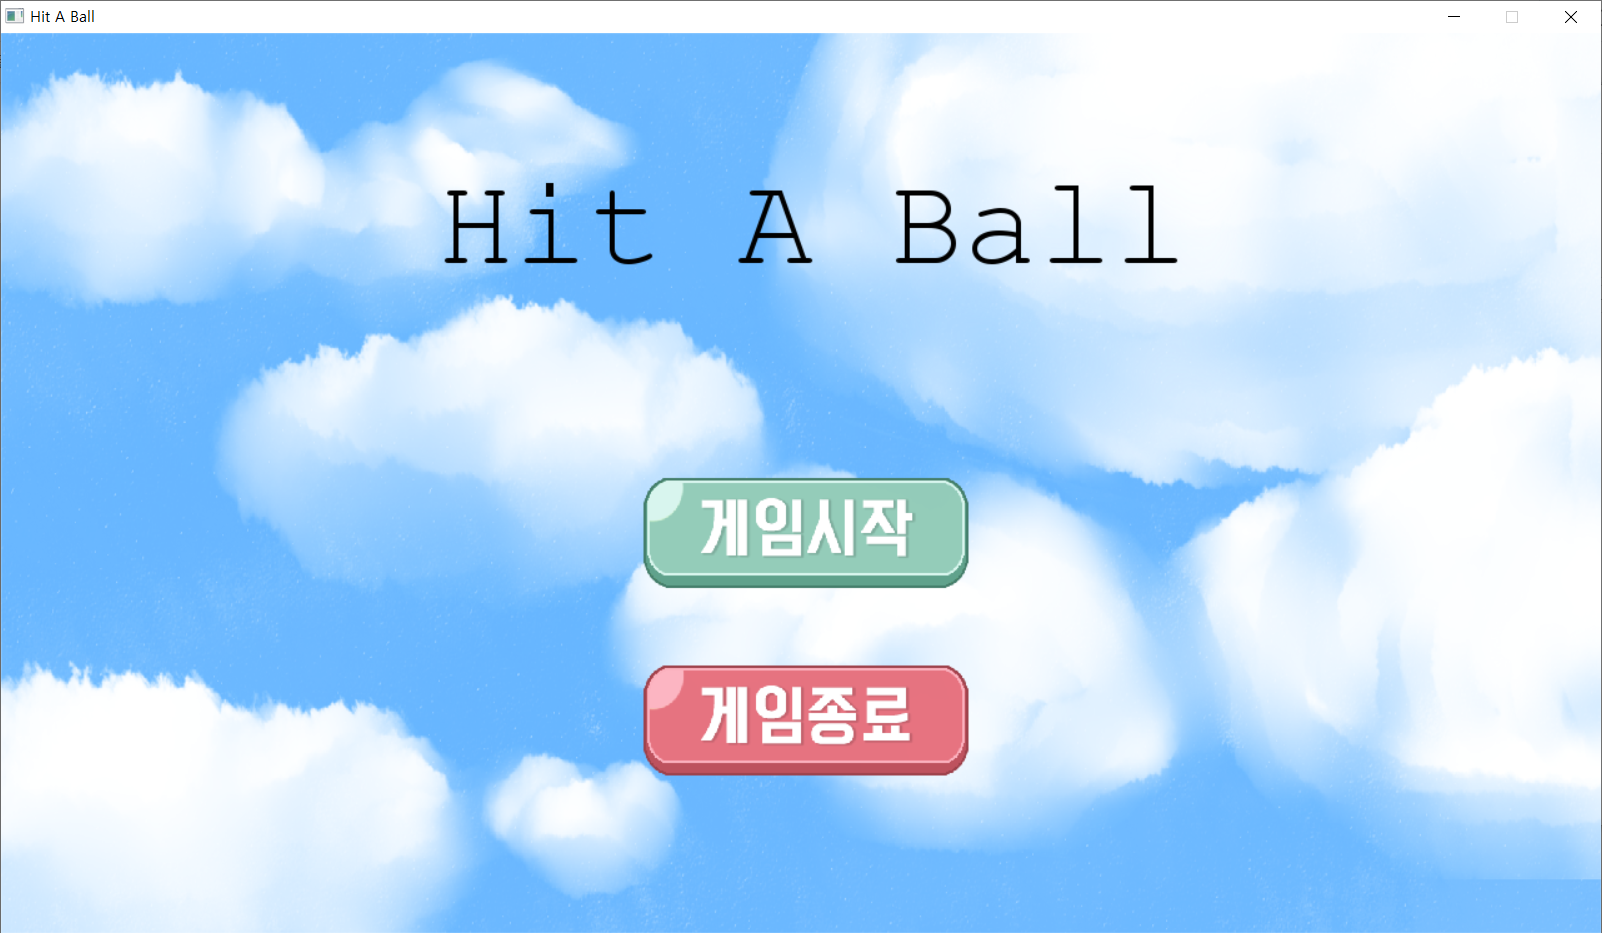

gameScene
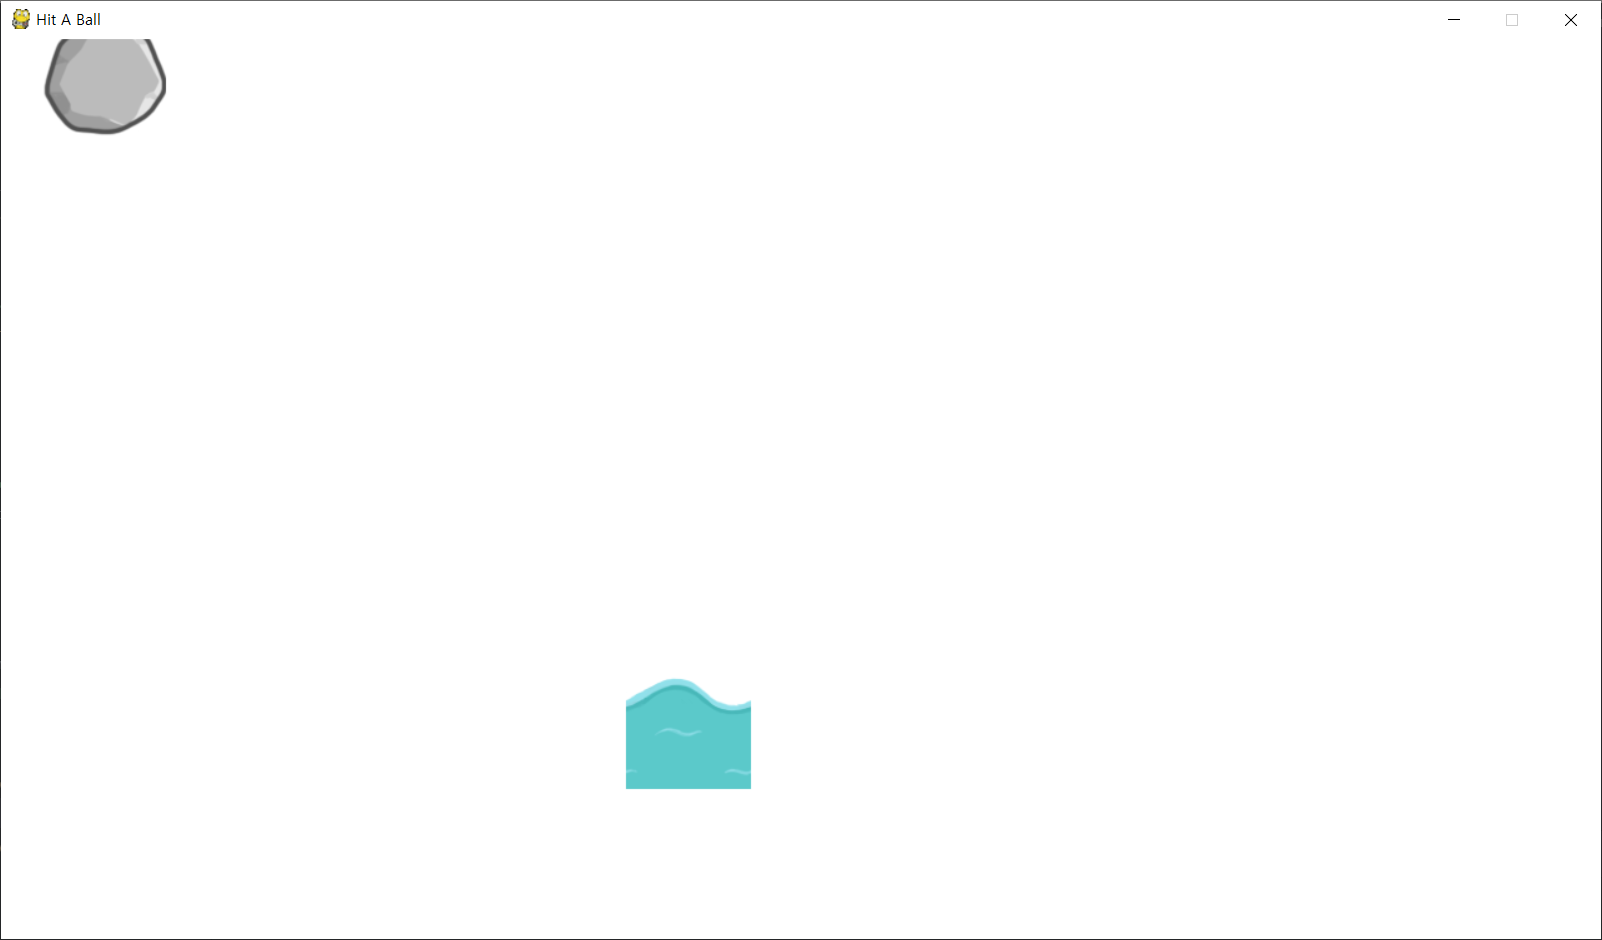

https://youtu.be/QV7X7AWk85g

현재 프로그램의 실행되는 모습입니다.

배경 음악, 버튼을 통한 씬 전환, 파도 애니메이션, 포물선 등의 기능을 구현하였습니다.

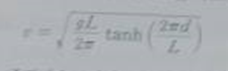

위 식을 이용하여 파도의 속도를 조절하였습니다.

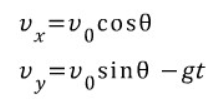

위 식을 이용하여 공의 포물선 운동을 구현하였습니다.

### 6.GitHub

[Hit A Ball](https://github.com/DaLae37/HitABall)

현재 프로젝트의 모든 소스 코드와 리소스는 위 링크에서 확인할 수 있습니다

## 7.Todo

1. 프레임워크에 공을 추적하는 카메라 클래스와 DataManager 클래스를 추가
2. gameScene의 배경과 오브젝트들을 배치
3. 플레이어 클래스 추가
4. 게임 로직 구현하기
5. 파이썬 파일을 실행 파일로 변경